<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI
## SEM2 2022/3

### CS6462 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
March 7th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Akshata
### Student Surname: Bheemasamudra Mallikarjunappa
### Student ID: 23164204
### Date of Final Submission: 31-03-2024
***

## Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures.
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity.

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

# *Random Variables and their domains,*
1. X<sub>L = {weak, strong}
2. X<sub>G = {A,B,C}
3. X<sub>F = {not active, active}
4. X<sub>I = {low, high}
5. X<sub>D = {easy, hard}
6. X<sub>H = {sick, healthy}

# *Dependencies,*

The student requires a **recommendation letter X<sub>L** **(Observation/Evidence)** from a professor,

Possible independent **Causes** of strong/weak letter:

-> Gardes X<sub>G

-> Forum Activity X<sub>F

Grades and Forum Activity are ancestors/parents of recomendation letter.

Possible independent causes of A/B/C grades:

-> Intelligence X<sub>I

-> Difficulty X<sub>D

-> Health X<sub>H

Intelligence, Difficulty, and Health are ancestors/parents of Grades.


### Step 1.2. Draw and show the DAG (7%)

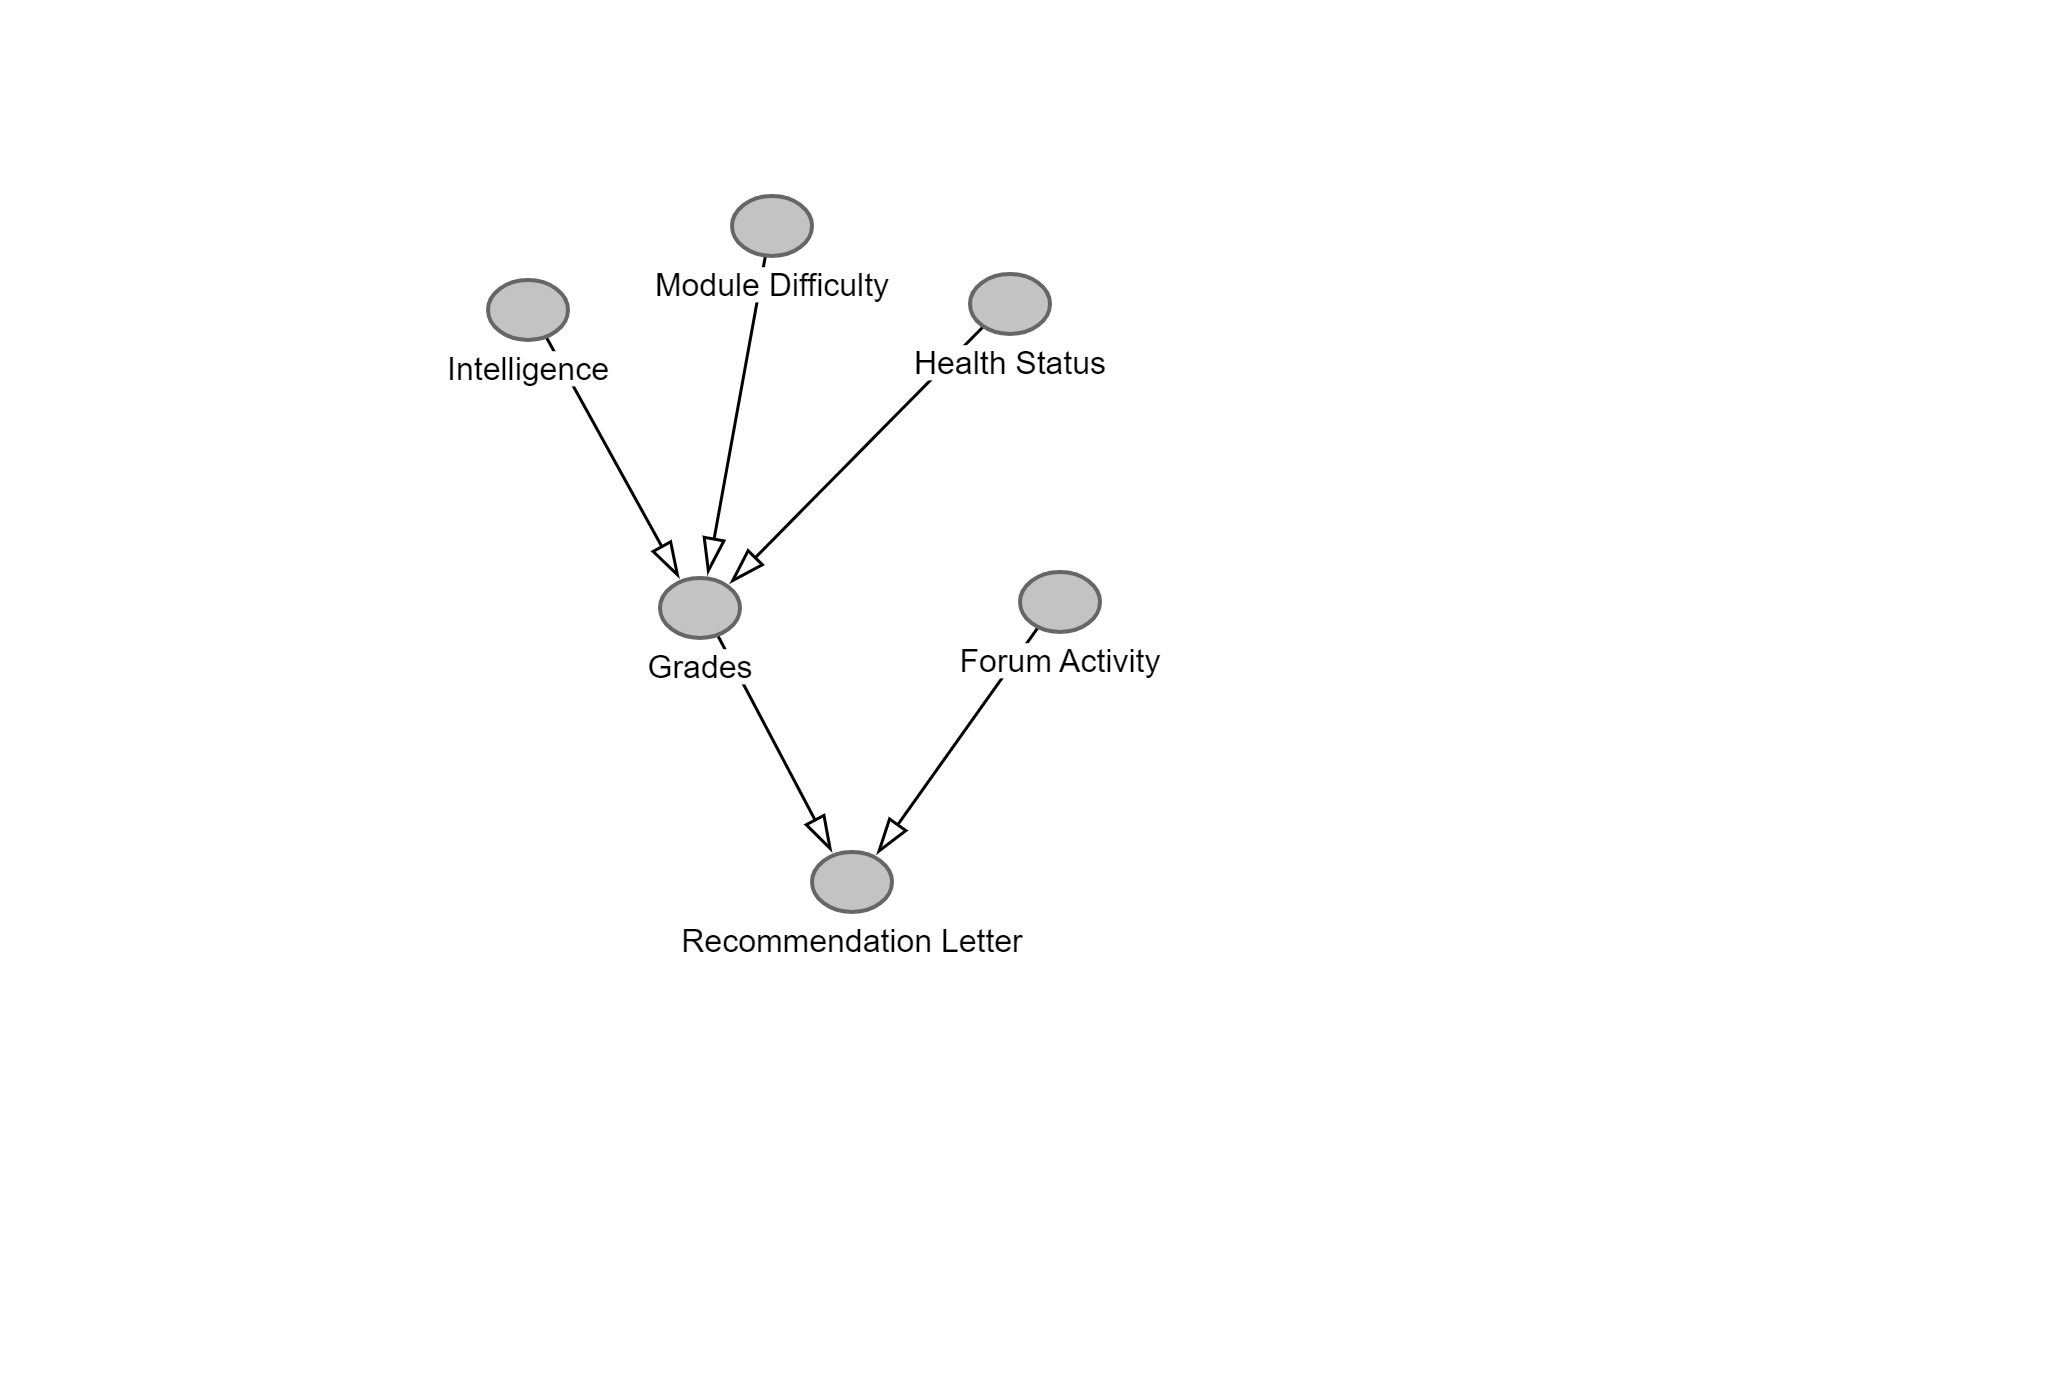

In [1]:
from IPython.display import Image

Image("/content/letter_recommendation.png")

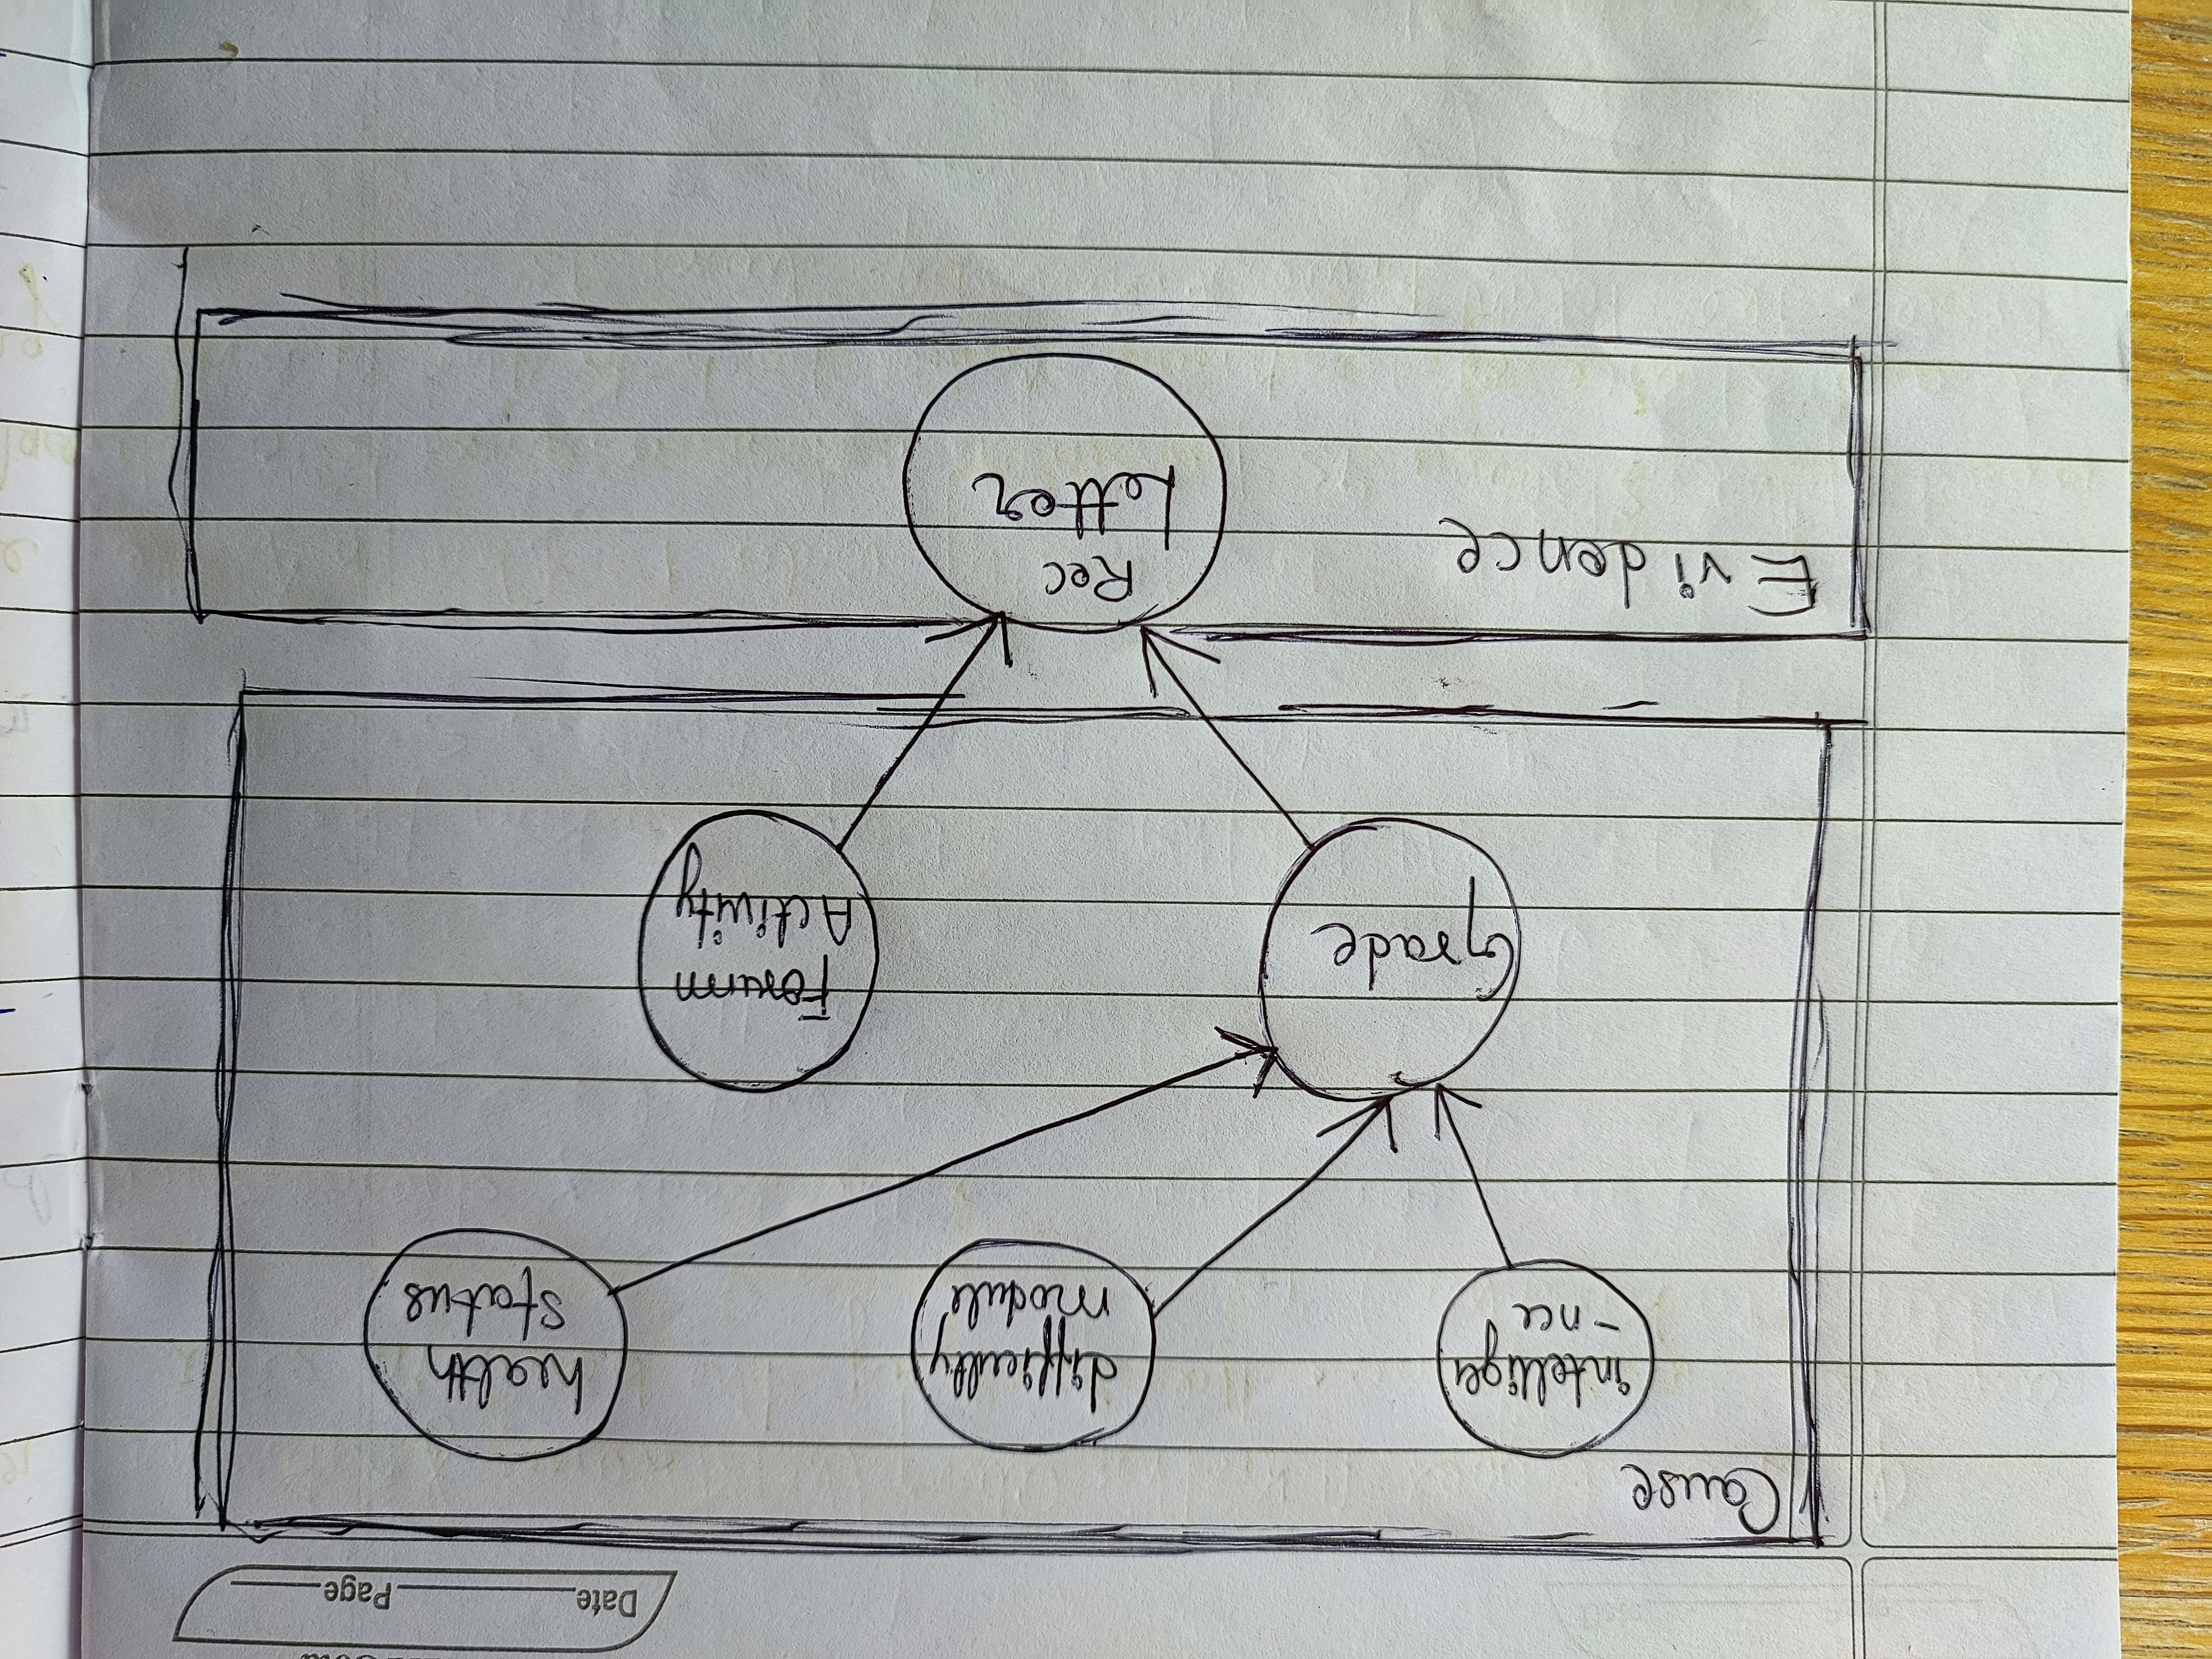

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

In [3]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [12]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

#**** define the Bayesian DAG structure
#
# we define the Bayesian structure by connecting nodes (random variables)
# the direction is determined from the order of the nodes
#
# here, recomendation_letter, grades, forum_activity, intelligence, module_difficulty, and health_status are random variables

model = BayesianNetwork([('intelligence', 'grades'), ('module_difficulty','grades'), ('health_status','grades'), ('grades', 'recommendation_letter'), ('forum_activity', 'recommendation_letter')])

### Step 1.4. Show the DAG of the Bayesian Network (1%)

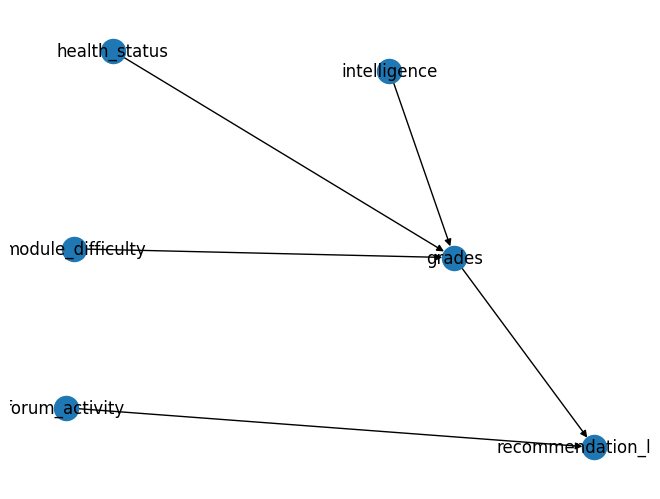

In [16]:
nx_graph = nx.DiGraph()
nx_graph.add_nodes_from(model.nodes())
nx_graph.add_edges_from(model.edges())

nx.draw(nx_graph, with_labels=True)
plt.show()

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

In [18]:
#**** define the Conditional Probability Distributions (CPDs)

# define CPD for intelligence
cpd_intelligence = TabularCPD (
    variable="intelligence",
    variable_card=2,
    values=[[0.7], [0.3]]
)

# define CPD for module_difficulty
cpd_module_difficulty = TabularCPD (
    variable="module_difficulty",
    variable_card=2,
    values=[[0.6], [0.4]]
)

# define CPD for health_status
cpd_health_status = TabularCPD (
    variable="health_status",
    variable_card=2,
    values=[[0.4], [0.6]]
)


# define CPD for grades
cpd_grades = TabularCPD (
    variable="grades",
    variable_card=3,
    values=[[0.9,0.8,0.4,0.5,0.3,0.3,0.05,0.02], [0.08,0.15,0.5,0.3,0.4,0.5,0.15,0.08], [0.02,0.05,0.1,0.2,0.3,0.2,0.8,0.9]],

    # define the evidences - one of the causes must be true
    evidence=["intelligence", "module_difficulty", "health_status"],
    evidence_card=[2,2,2]
)



# define CPD for forum_activity
cpd_forum_activity = TabularCPD (
    variable="forum_activity",
    variable_card=2,
    values=[[0.2], [0.8]]
)


# define CPD for recommendation letter
cpd_recommendation_letter = TabularCPD (
    variable="recommendation_letter",
    variable_card=2,
    values=[[0.9,0.6,0.2,0.7,0.5,0.1],[0.1,0.4,0.8,0.3,0.5,0.9]],
    evidence=["grades", "forum_activity"],
    evidence_card=[3,2]
)

### Step 2.2: Associate the distribution models with the network structure (2%)

In [19]:
model.add_cpds(cpd_intelligence, cpd_module_difficulty, cpd_health_status, cpd_grades, cpd_forum_activity, cpd_recommendation_letter)

### Step 2.3: Check the model (2%)

In [20]:
model.check_model()

True

## Step 3: Inference with the Bayesian Network (30%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (10%)

In [21]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)


    P(Cause|Evidence) =  [ P(Evidence|Cause) * P(Cause) ] / P(Evidence)
    
		                              

In [27]:
#**** infer posterior probability
# evidence={'computer_failure': 0} means computer_failure = yes
#
posterior_p = infer.query(['grades'], evidence={'recommendation_letter': 1})

In [28]:
print(posterior_p)

+-----------+---------------+
| grades    |   phi(grades) |
+===========+===============+
| grades(0) |        0.4034 |
+-----------+---------------+
| grades(1) |        0.2229 |
+-----------+---------------+
| grades(2) |        0.3736 |
+-----------+---------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

𝑷(𝒄𝟏)=∑(𝒂∈𝑨)∑(𝒃∈𝑩) 〖𝑷(𝑨=𝒂∩𝑩=𝒃∩𝑪=𝒄𝟏)〗

In [29]:
prior_p = infer.query(['recommendation_letter'], evidence={})

In [30]:
print(prior_p)

+--------------------------+------------------------------+
| recommendation_letter    |   phi(recommendation_letter) |
+==========================+==============================+
| recommendation_letter(0) |                       0.5454 |
+--------------------------+------------------------------+
| recommendation_letter(1) |                       0.4546 |
+--------------------------+------------------------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [33]:
prior_p_01 = infer.query(['recommendation_letter'], evidence={'grades': 0, 'forum_activity': 0})
prior_p_11 = infer.query(['recommendation_letter'], evidence={'grades': 1, 'forum_activity': 0})
prior_p_21 = infer.query(['recommendation_letter'], evidence={'grades': 2, 'forum_activity': 0})

In [34]:
print(prior_p_01,prior_p_11,prior_p_21)

+--------------------------+------------------------------+
| recommendation_letter    |   phi(recommendation_letter) |
+==========================+==============================+
| recommendation_letter(0) |                       0.9000 |
+--------------------------+------------------------------+
| recommendation_letter(1) |                       0.1000 |
+--------------------------+------------------------------+ +--------------------------+------------------------------+
| recommendation_letter    |   phi(recommendation_letter) |
+==========================+==============================+
| recommendation_letter(0) |                       0.2000 |
+--------------------------+------------------------------+
| recommendation_letter(1) |                       0.8000 |
+--------------------------+------------------------------+ +--------------------------+------------------------------+
| recommendation_letter    |   phi(recommendation_letter) |
+==========================+============